In [36]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.models import Sequential, load_model

img_width, img_height = 150, 150
model_path = './models/new_model2.h5'
model_weights_path = './models/new_weights2.h5'
model = load_model(model_path)
model.load_weights(model_weights_path)

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 32)        18464     
__________

In [38]:
import numpy as np
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    './data/test/',
    target_size=(150,150),
    batch_size=32,
    shuffle=False)

#test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=2)
# Get most likely class


Found 216 images belonging to 6 classes.


In [39]:
predicted_classes = np.argmax(predictions, axis=1)
predicted_classes


array([0, 3, 3, 3, 3, 0, 4, 4, 4, 4, 4, 0, 3, 3, 0, 0, 0, 3, 4, 4, 0, 0, 4,
       4, 0, 4, 4, 4, 4, 4, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 3,
       3, 3, 3, 0, 0, 3, 3, 3, 3, 4, 4, 4, 4, 3, 1, 3, 4, 3, 1, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 2, 3, 4, 1, 1, 4, 3, 4, 3, 4, 3, 3, 3, 4, 3, 1, 1, 3,
       4, 1, 3, 3, 3, 3, 4, 3, 4, 4, 2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2,
       3, 4, 3, 2, 4, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 2, 2, 4, 2,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 5, 3, 4, 4, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 0, 3])

In [40]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

In [41]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int32)

In [44]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   


             precision    recall  f1-score   support

      trash       0.96      0.42      0.58        55
      metal       0.78      0.17      0.28        41
    plastic       0.93      0.32      0.47        44
      glass       0.25      0.97      0.40        29
      paper       0.31      0.59      0.40        29
  cardboard       0.00      0.00      0.00        18

avg / total       0.66      0.41      0.41       216



In [45]:
cm = metrics.confusion_matrix(true_classes,predicted_classes)
print(cm)

[[23  0  0 17 15  0]
 [ 0  7  1 21 12  0]
 [ 0  2 14 19  9  0]
 [ 0  0  0 28  1  0]
 [ 0  0  0 11 17  1]
 [ 1  0  0 16  1  0]]


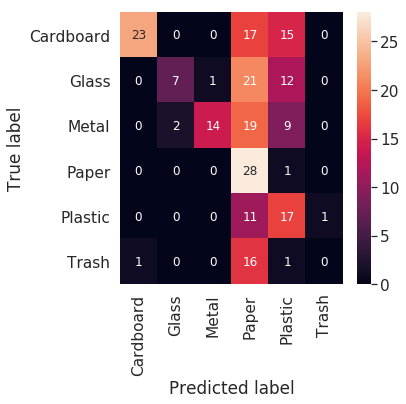

In [46]:
import seaborn as sn
import pandas  as pd
import matplotlib.pyplot as plt

labels = ['Cardboard', 'Glass','Metal','Paper','Plastic','Trash' ]
df_cm = pd.DataFrame(cm, labels,
                  labels)
plt.figure(figsize = (5,5))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

python tra.py 
Using TensorFlow backend.
tra.py:48: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=256, activation="relu")`
  classifier.add(Dense(output_dim=256,activation='relu'))
tra.py:49: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=128, activation="relu")`
  classifier.add(Dense(output_dim=128,activation='relu'))
tra.py:50: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="softmax")`
  classifier.add(Dense(output_dim=6,activation='softmax'))
Found 2527 images belonging to 6 classes.
Found 0 images belonging to 0 classes.
Epoch 1/10
2018-10-12 07:48:27.066665: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.1 instructions, but these are available on your machine and could speed up CPU computations.
2018-10-12 07:48:27.066703: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use SSE4.2 instructions, but these are available on your machine and could speed up CPU computations.
2018-10-12 07:48:27.066716: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX instructions, but these are available on your machine and could speed up CPU computations.
2018-10-12 07:48:27.066729: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use AVX2 instructions, but these are available on your machine and could speed up CPU computations.
2018-10-12 07:48:27.066744: W tensorflow/core/platform/cpu_feature_guard.cc:45] The TensorFlow library wasn't compiled to use FMA instructions, but these are available on your machine and could speed up CPU computations.
79/10 [=============================================================================================================================================================================================================================================] - 431s 5s/step - loss: 1.6641 - acc: 0.5025
Epoch 2/10
79/10 [=============================================================================================================================================================================================================================================] - 429s 5s/step - loss: 1.1273 - acc: 0.6254
Epoch 3/10
79/10 [=============================================================================================================================================================================================================================================] - 449s 6s/step - loss: 0.9673 - acc: 0.6918
Epoch 4/10
79/10 [=============================================================================================================================================================================================================================================] - 438s 6s/step - loss: 0.8875 - acc: 0.7246
Epoch 5/10
79/10 [=============================================================================================================================================================================================================================================] - 474s 6s/step - loss: 0.7123 - acc: 0.7772
Epoch 6/10
79/10 [=============================================================================================================================================================================================================================================] - 443s 6s/step - loss: 0.6572 - acc: 0.7855
Epoch 7/10
79/10 [=============================================================================================================================================================================================================================================] - 443s 6s/step - loss: 0.5617 - acc: 0.8120
Epoch 8/10
79/10 [=============================================================================================================================================================================================================================================] - 429s 5s/step - loss: 0.4822 - acc: 0.8406
Epoch 9/10
79/10 [=============================================================================================================================================================================================================================================] - 427s 5s/step - loss: 0.4303 - acc: 0.8616
Epoch 10/10
79/10 [=============================================================================================================================================================================================================================================] - 426s 5s/step - loss: 0.4194 - acc: 0.8714
